In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
np.set_printoptions(suppress=True)

In [ ]:
df_customers = pd.read_csv("Project2_DataCollection_Resources/customers.csv")
df_loans = pd.read_csv("Project2_DataCollection_Resources/loans.csv")
df_bureau = pd.read_csv("Project2_DataCollection_Resources/bureau_data.csv")

In [ ]:
print(df_customers.shape),
print(df_loans.shape),
print(df_bureau.shape)

(50000, 12)
(50000, 15)
(50000, 8)


In [ ]:
df = pd.merge(df_customers,df_loans,on = 'cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [ ]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [ ]:
X = df.drop('default',axis='columns')
y = df['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test = pd.concat([X_test, y_test], axis='columns')


In [ ]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [ ]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2023-02-03,2023-02-04,4,2,125,3,21,7,48,0
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,2023-09-27,2023-10-17,3,1,131,14,89,8,97,1


In [ ]:
df_train.shape

(37500, 33)

In [ ]:
df_test.shape

(12500, 33)

In [ ]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [ ]:
df.residence_type.value_counts()

residence_type
Owned       28238
Mortgage    11819
Rented       9881
Name: count, dtype: int64

In [ ]:
df_train.residence_type.unique()


array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [ ]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [ ]:
df_train.residence_type.fillna(mode_residence, inplace=True)

C:\Users\agamb\AppData\Local\Temp\ipykernel_1064\2407676634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


In [ ]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [ ]:
df_test.residence_type.fillna(mode_residence, inplace=True)

C:\Users\agamb\AppData\Local\Temp\ipykernel_1064\504530992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [ ]:
columns_continuous = ['age','income','number_of_dependants','years_at_current_address','sanction_amount','loan_amount','processing_fee','gst','net_disbursement','loan_tenure_months','principal_outstanding','bank_balance_at_application','number_of_open_accounts','number_of_closed_accounts','total_loan_months','delinquent_months','total_dpd','enquiry_count','credit_utilization_ratio']

columns_categorical = ['gender','marital_status','employment_status','residence_type','city','state','zipcode','loan_purpose','loan_type','default']

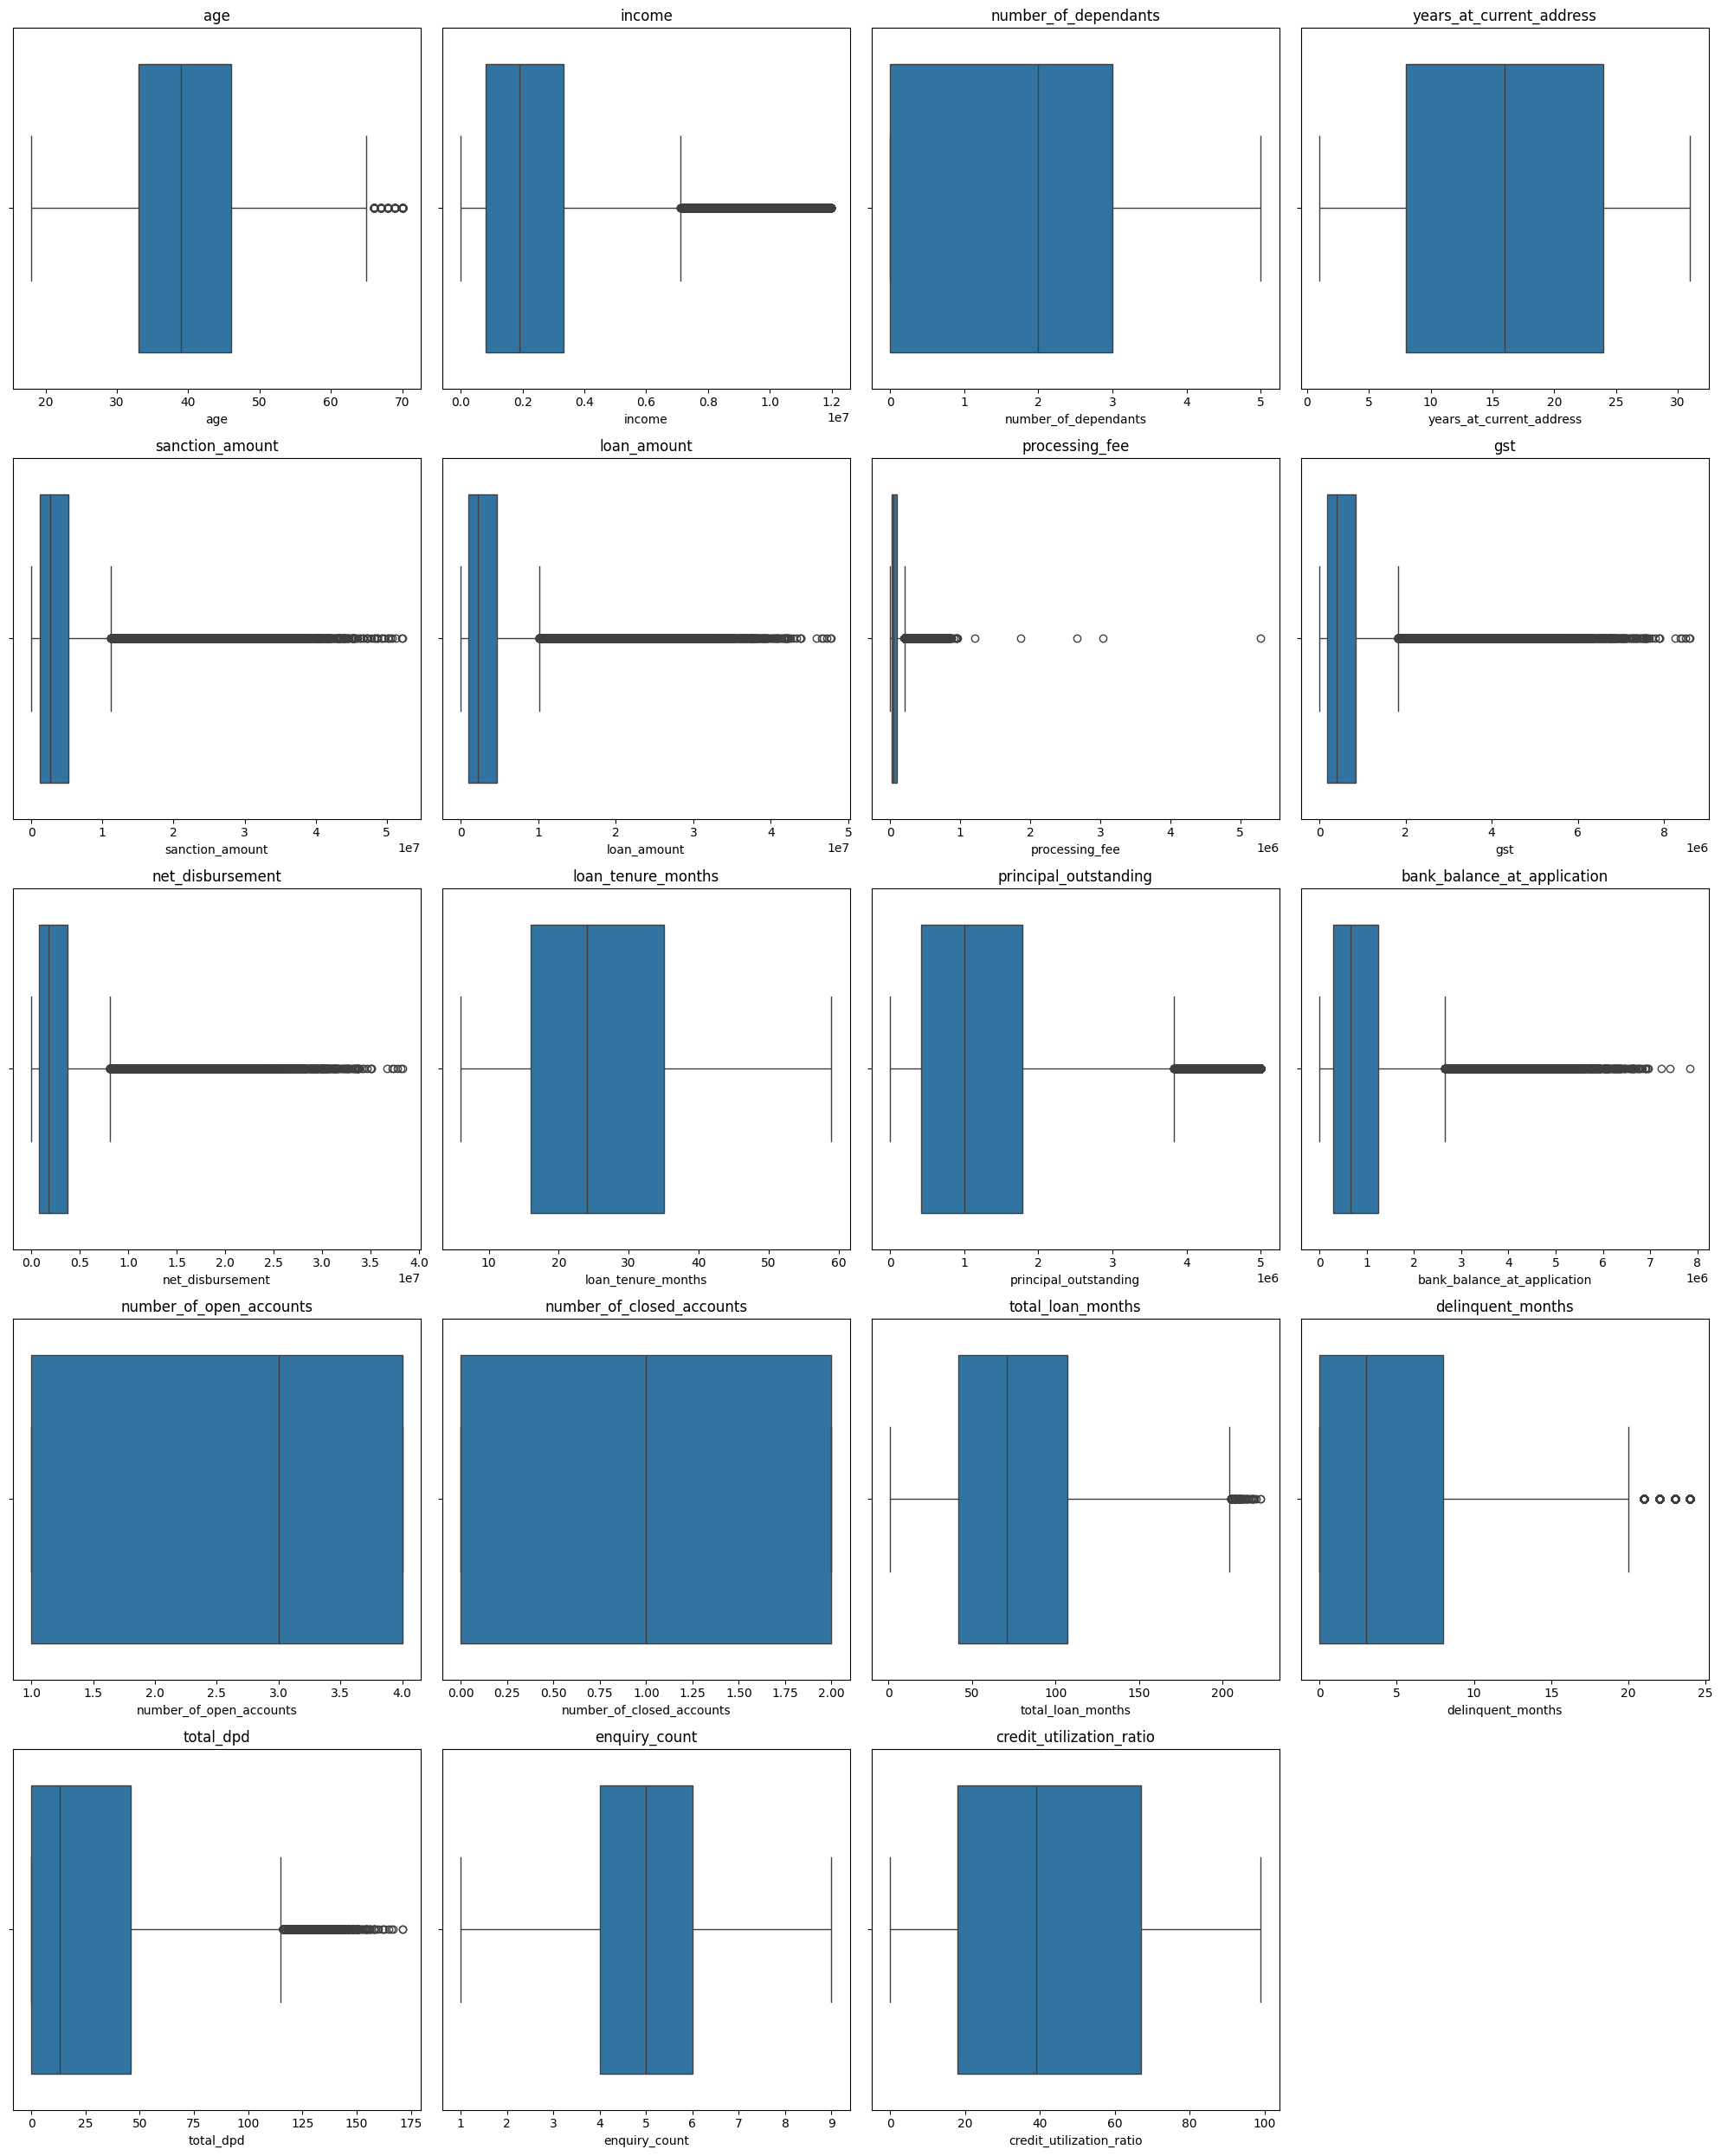

In [ ]:
num_plots = len(columns_continuous)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
  sns.boxplot(x=df_train[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(i+1,num_rows * num_cols):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

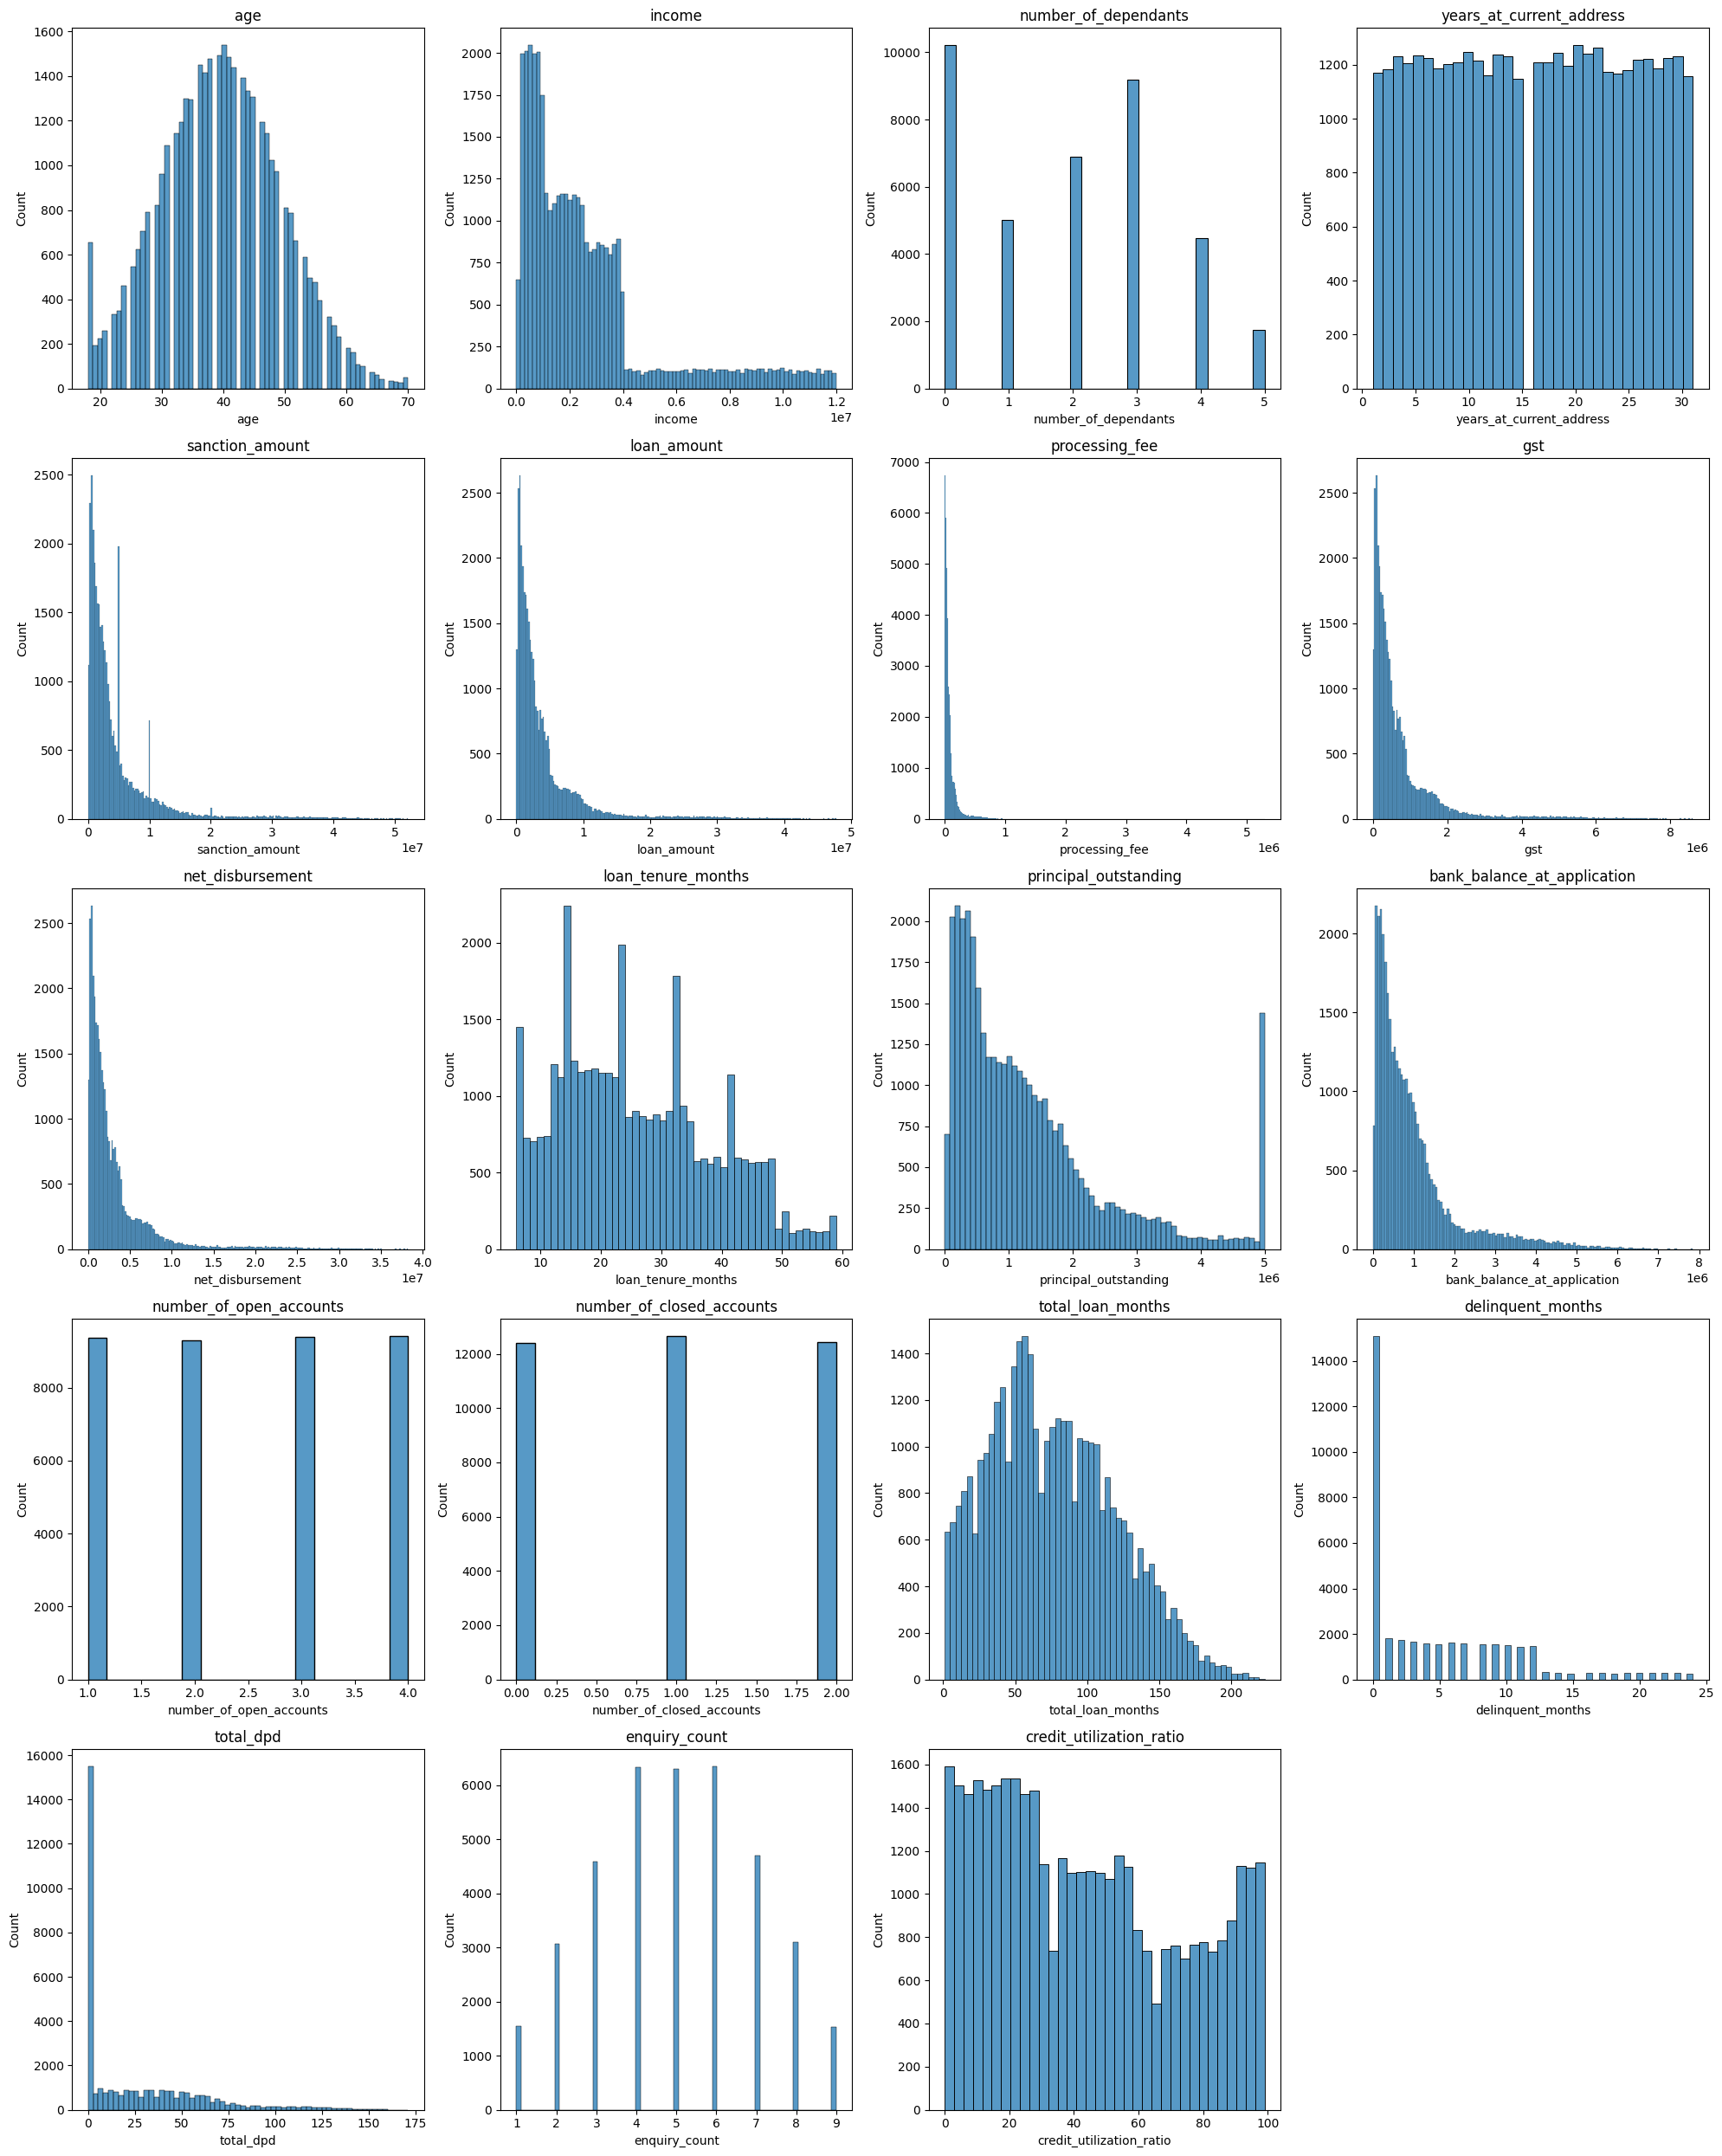

In [ ]:
num_plots = len(columns_continuous)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
  sns.histplot(x=df_train[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(i+1,num_rows * num_cols):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df_train.processing_fee.describe()

count     37500.000
mean      80290.677
std      113128.140
min           0.000
25%       19220.000
50%       44600.000
75%       92420.000
max     5293543.524
Name: processing_fee, dtype: float64

In [ ]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.023
28174,966000,1214492.673
47089,1738000,1858964.768
29305,2616000,3036378.005
9898,3626000,5293543.524


In [ ]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()

In [ ]:
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [ ]:
# Applying same changes on test set
df_test = df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()
df_test.shape

(12497, 33)

In [ ]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
for col in columns_categorical:
  print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [ ]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace("Personaal","Personal")
df_test['loan_purpose'] = df_train_1['loan_purpose'].replace("Personaal","Personal")

In [ ]:
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [ ]:
df_train_1.loan_amount.unique()

array([23442000,  1149000, 11296000, ..., 17208000,  6858000, 18545000],
      shape=(10921,))

In [ ]:
df_train_1['loan_amount'] = df_train['loan_amount']


<h3 align="center" style="color:blue">Exploratory Data Analytics</h3>

In [ ]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

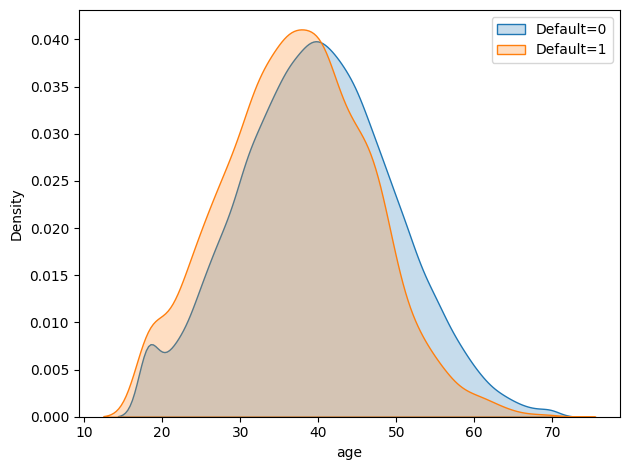

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]["age"],fill=True,label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]["age"],fill=True,label='Default=1')
plt.legend()
plt.tight_layout()
plt.show()

Insights
1. Orange graph is a little bit shifted to the left of blue which indicates that people with young age are more likely to default

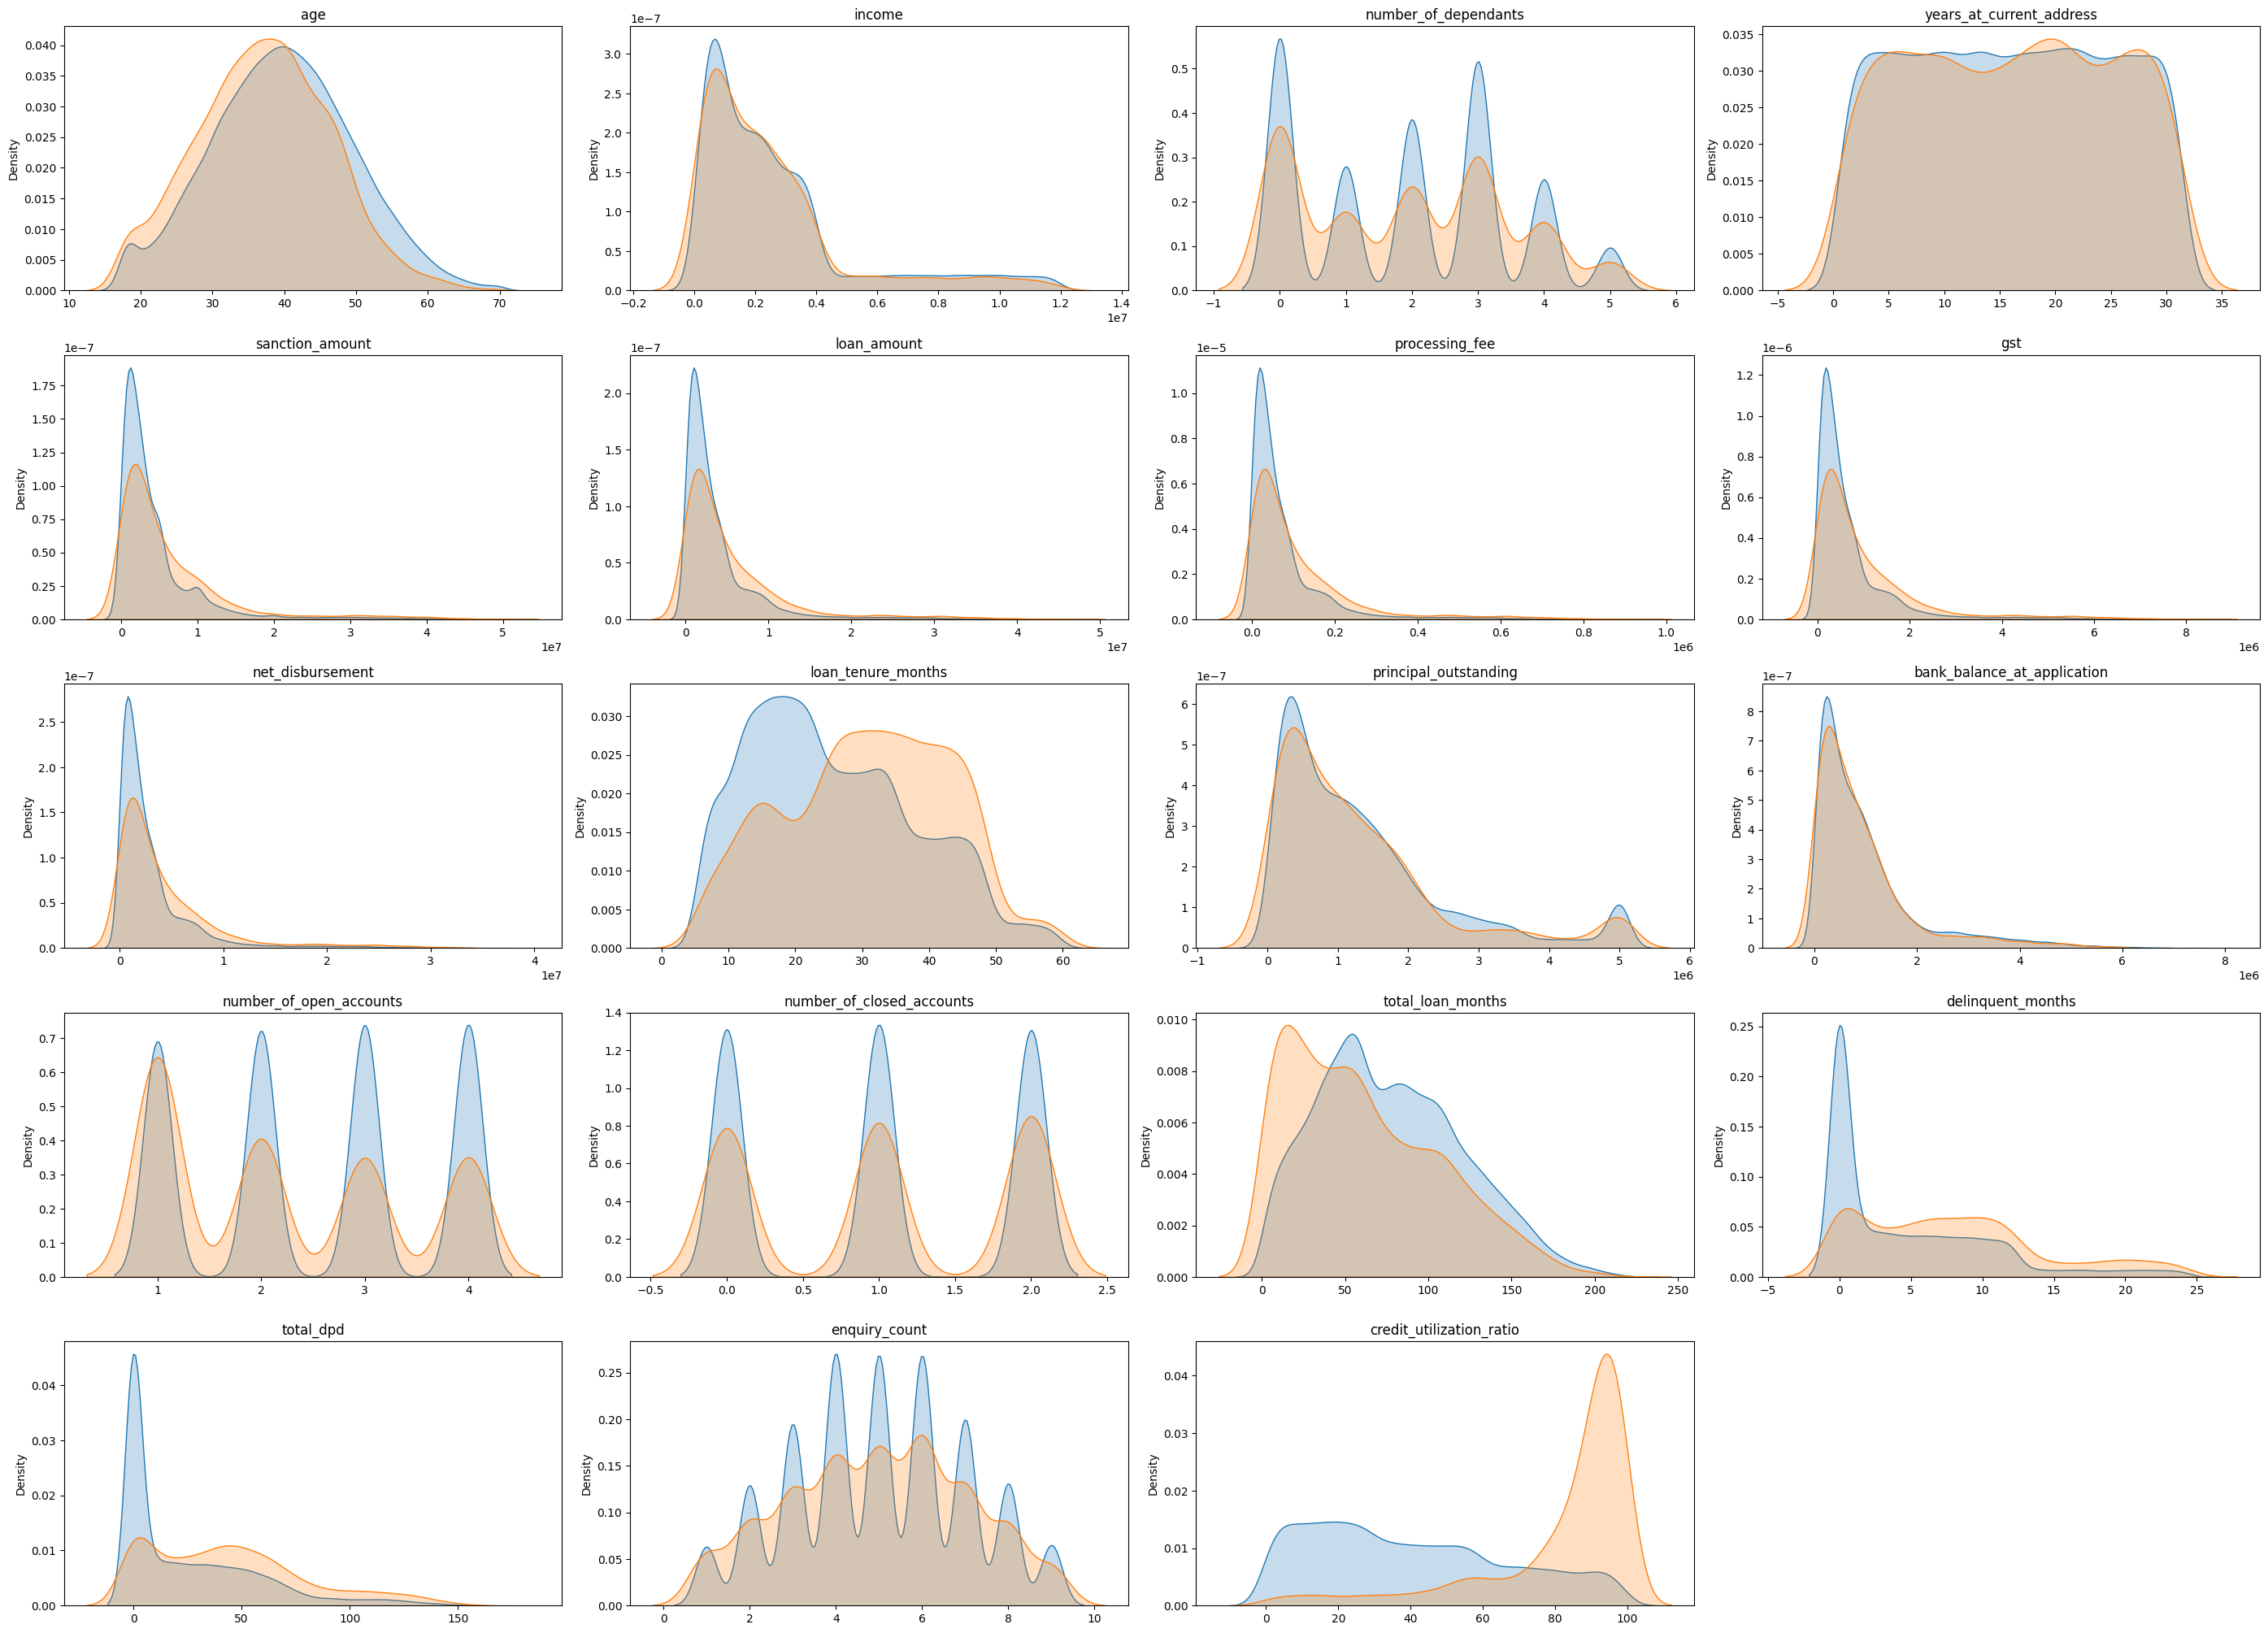

In [ ]:
plt.figure(figsize=(28,24))
for i, col in enumerate (columns_continuous):
  plt.subplot(6,4,i+1)
  sns.kdeplot(df_train_1[col][df_train_1['default']==0],fill=True, label='default=0')
  sns.kdeplot(df_train_1[col][df_train_1['default']==1],fill=True, label='default=1')
  plt.title(col)
  plt.xlabel('')

plt.tight_layout()
plt.show()

Insights
1. In columns: loan_tenure_months, deliquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming of a default. Hence these 4 looks strong predictors
2. In remaining columns the distributions do not give any obvious insights
3. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to icome ratio(LTI), that may have influence on the target variable. We will explore more later 

<h3 align='center' style='color:blue'>Feature Engineering</h3>

In [ ]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.000
mean        1.557
std         0.974
min         0.300
25%         0.770
50%         1.160
75%         2.460
max         4.570
Name: loan_to_income, dtype: float64

In [ ]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)
df_test['loan_to_income'].describe()

count   12497.000
mean        1.551
std         0.966
min         0.300
25%         0.780
50%         1.160
75%         2.430
max         4.590
Name: loan_to_income, dtype: float64

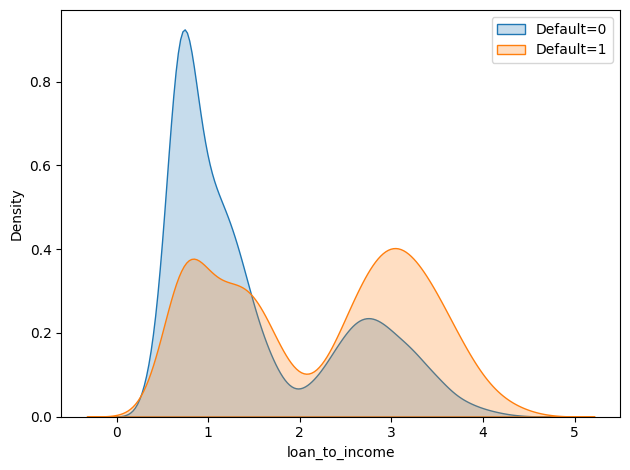

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"],fill=True,label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"],fill=True,label='Default=1')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [ ]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [ ]:
df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months']*100/df_train_1['total_loan_months'],1)
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,4,2,152,20,118,4,36,0,2.070,13.200
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,3,1,160,10,62,5,5,0,1.610,6.200
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,1,1,54,12,67,4,0,0,3.540,22.200
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,3,0,76,0,0,8,87,0,1.130,0.000
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,1,2,60,0,0,1,71,0,0.500,0.000


In [ ]:
df_train_1['delinquency_ratio'].describe()

count   37488.000
mean       10.330
std        17.298
min         0.000
25%         0.000
50%         3.700
75%        12.900
max       100.000
Name: delinquency_ratio, dtype: float64

In [ ]:
df_test['delinquency_ratio'] = round(df_test['delinquent_months']*100/df_test['total_loan_months'],1)
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2,1,42,0,0,5,98,0,2.650,0.000
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,4,0,125,0,0,5,32,0,1.240,0.000
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,3,0,76,0,0,6,82,0,1.070,0.000
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,4,2,125,3,21,7,48,0,2.740,2.400
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,3,1,131,14,89,8,97,1,2.040,10.700


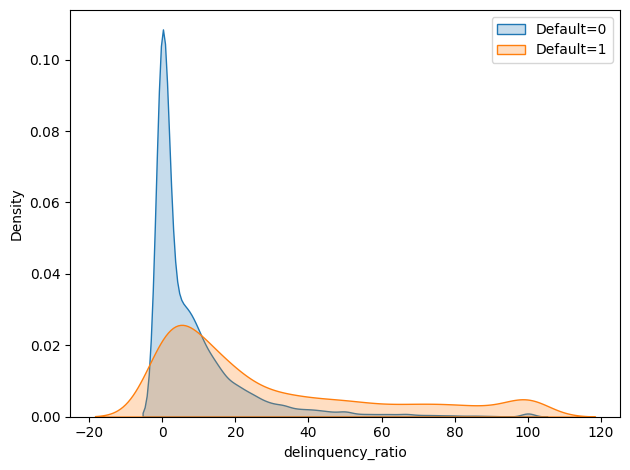

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]["delinquency_ratio"],fill=True,label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]["delinquency_ratio"],fill=True,label='Default=1')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
  df_train_1['delinquent_months'] != 0,
  (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),
  0
)

In [ ]:
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2,152,20,118,4,36,0,2.070,13.200,5.900
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,1,160,10,62,5,5,0,1.610,6.200,6.200
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,1,54,12,67,4,0,0,3.540,22.200,5.600
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,0,76,0,0,8,87,0,1.130,0.000,0.000
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2,60,0,0,1,71,0,0.500,0.000,0.000


In [ ]:
df_train_1['avg_dpd_per_delinquency'].describe()

count   37488.000
mean        3.284
std         2.907
min         0.000
25%         0.000
50%         4.300
75%         5.725
max        10.000
Name: avg_dpd_per_delinquency, dtype: float64

In [ ]:
df_test['avg_dpd_per_delinquency'] = np.where(
  df_test['delinquent_months'] != 0,
  (df_test['total_dpd']/df_test['delinquent_months']).round(1),
  0
)

In [ ]:
df_test['avg_dpd_per_delinquency'].describe()

count   12497.000
mean        3.338
std         2.897
min         0.000
25%         0.000
50%         4.400
75%         5.800
max        10.000
Name: avg_dpd_per_delinquency, dtype: float64

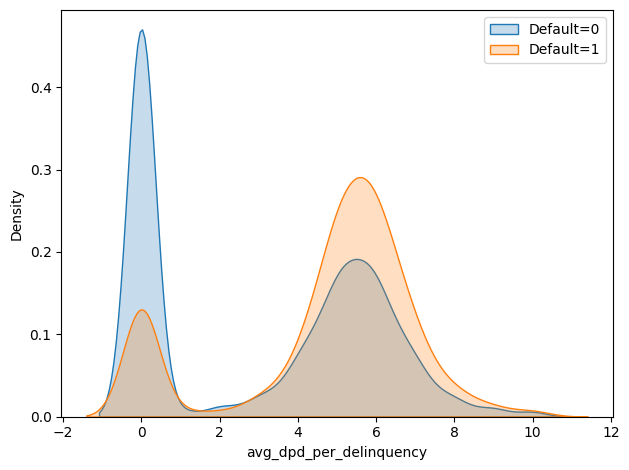

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]["avg_dpd_per_delinquency"],fill=True,label='Default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]["avg_dpd_per_delinquency"],fill=True,label='Default=1')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection

In [ ]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'],axis='columns')
df_test = df_test.drop(['cust_id','loan_id'],axis='columns')

In [ ]:
df_train_3 = df_train_2.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months','delinquent_months','total_dpd'],axis='columns')
df_test = df_test.drop(['disbursal_date','installment_start_dt','loan_amount','income','total_loan_months','delinquent_months','total_dpd'],axis='columns')

In [ ]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
X_train = df_train_3.drop('default', axis=1)
y_train = df_train_3['default']

cols_to_scale = X_train.select_dtypes(['int64','float64']).columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,M,Married,Self-Employed,0.600,Owned,0.967,Hyderabad,Telangana,0.661,...,0.415,1.000,0.613,1.000,1.000,0.375,0.364,0.415,0.132,0.590
32495,0.500,F,Single,Salaried,0.000,Owned,0.867,Mumbai,Maharashtra,0.492,...,0.830,0.087,0.025,0.667,0.500,0.500,0.051,0.307,0.062,0.620
43675,0.385,M,Single,Salaried,0.000,Mortgage,0.833,Chennai,Tamil Nadu,0.831,...,0.491,0.327,0.174,0.000,0.500,0.375,0.000,0.759,0.222,0.560
9040,0.462,M,Married,Salaried,0.400,Mortgage,0.967,Bangalore,Karnataka,0.763,...,0.642,0.199,0.078,0.667,0.000,0.875,0.879,0.194,0.000,0.000
13077,0.769,M,Married,Self-Employed,0.800,Owned,0.933,Pune,Maharashtra,0.510,...,0.170,0.124,0.072,0.000,1.000,0.000,0.717,0.047,0.000,0.000


In [ ]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.389,0.500,0.524,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.501,0.501,0.501,0.439,0.294,0.103,0.328
std,0.190,0.307,0.297,0.286,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.373,0.407,0.254,0.297,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.492,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.201,0.037,0.430
75%,0.538,0.600,0.767,0.763,0.098,0.096,0.096,0.096,0.547,0.352,0.155,1.000,1.000,0.625,0.677,0.506,0.129,0.573
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

cols_to_scale = X_test.select_dtypes(['int64','float64']).columns

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000
mean,0.415,0.385,0.503,0.525,0.089,0.083,0.083,0.083,0.375,0.265,0.125,0.497,0.500,0.501,0.436,0.293,0.106,0.334
std,0.189,0.307,0.298,0.286,0.121,0.113,0.113,0.113,0.234,0.245,0.135,0.373,0.407,0.254,0.295,0.226,0.173,0.290
min,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.080,0.034,0.000,0.000,0.375,0.182,0.112,0.000,0.000
50%,0.423,0.400,0.500,0.510,0.050,0.046,0.046,0.046,0.340,0.198,0.084,0.333,0.500,0.500,0.394,0.201,0.042,0.440
75%,0.538,0.600,0.767,0.763,0.097,0.095,0.095,0.095,0.547,0.357,0.158,0.667,1.000,0.625,0.677,0.499,0.134,0.580
max,1.000,1.000,1.000,1.000,0.981,0.964,0.964,0.964,1.000,1.000,0.939,1.000,1.000,1.000,1.000,1.005,1.000,1.000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [ ]:
calculate_vif(X_train[cols_to_scale])

c:\Users\agamb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.701
1,number_of_dependants,2.730
2,years_at_current_address,3.423
3,zipcode,3.798
4,sanction_amount,101.087
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181
9,principal_outstanding,16.326


In [ ]:
features_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
num_columns = X_train_1.select_dtypes(['int64','float64']).columns
num_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
vif_df = calculate_vif(X_train_1[num_columns])
vif_df

,Column,VIF
0,age,5.429
1,number_of_dependants,2.727
2,years_at_current_address,3.404
3,zipcode,3.778
4,loan_tenure_months,6.019
5,bank_balance_at_application,1.805
6,number_of_open_accounts,4.353
7,number_of_closed_accounts,2.372
8,enquiry_count,6.384
9,credit_utilization_ratio,2.920


In [ ]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

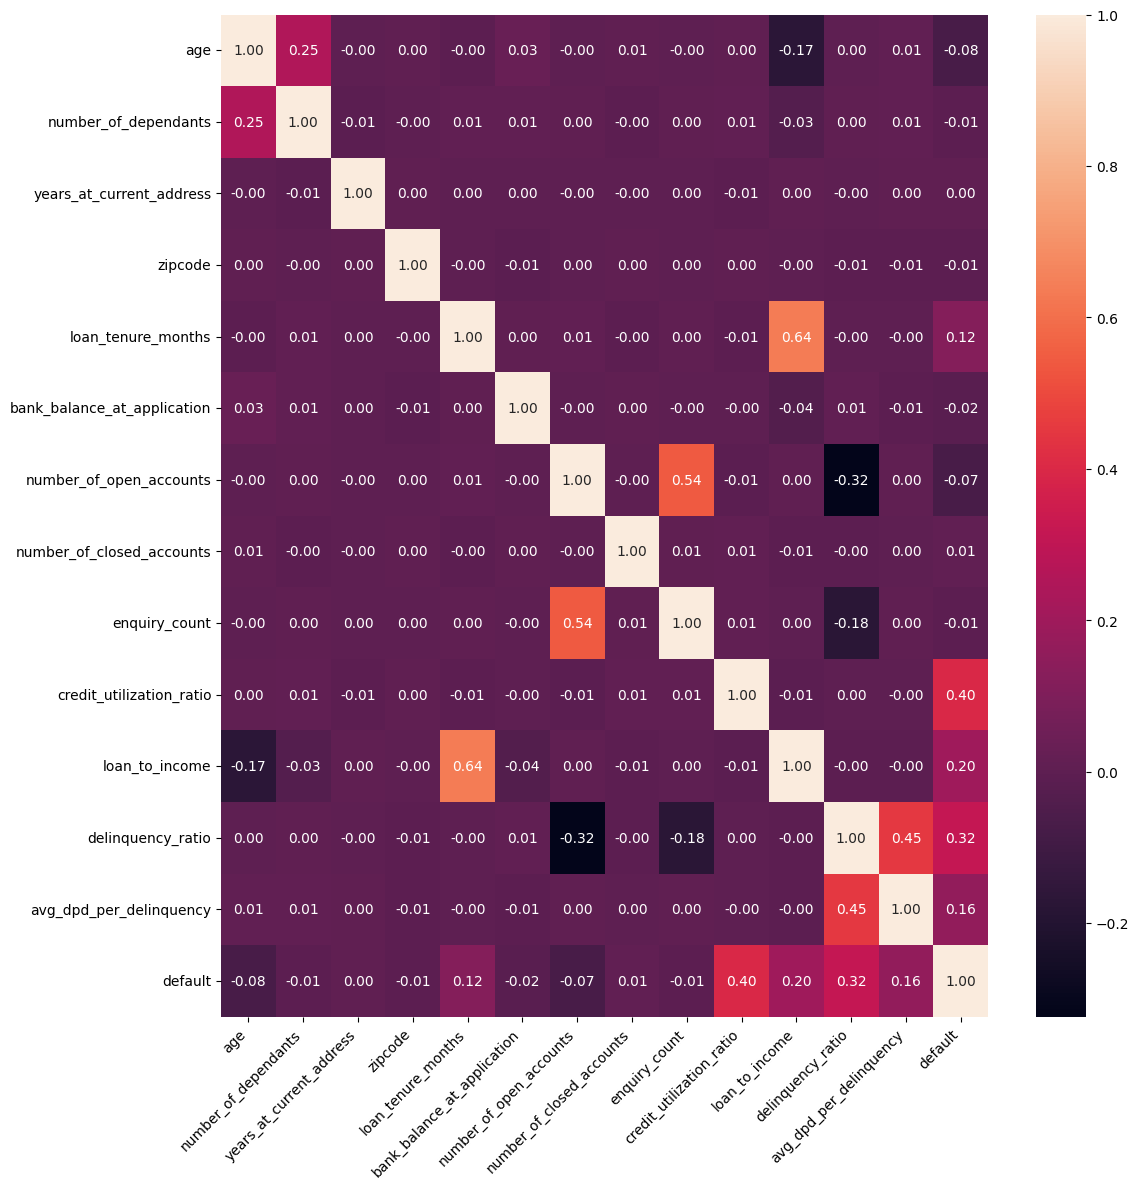

In [ ]:
plt.figure(figsize=(12,12))
cm = df_train_3[num_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
temp = pd.concat([X_train_1,y_train],axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [ ]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])

    grouped = grouped.rename(columns={
        'count': 'total',
        'sum': 'good'
    })

    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad

    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped,total_iv




grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1), 'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101,0.208,-0.717,0.076
Education,5620,559,5061,0.173,0.148,0.161,0.004
Home,11304,1734,9570,0.538,0.279,0.656,0.170
Personal,13117,603,12514,0.187,0.365,-0.669,0.119


In [ ]:
pd.cut(X_train_1['loan_to_income'],bins=10)

12746       (0.4, 0.5]
32495       (0.3, 0.4]
43675       (0.7, 0.8]
9040        (0.1, 0.2]
13077    (-0.001, 0.1]
             ...      
28515    (-0.001, 0.1]
5558        (0.1, 0.2]
45236       (0.7, 0.8]
49228       (0.2, 0.3]
37784       (0.1, 0.2]
Name: loan_to_income, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [ ]:
iv_values = {}
for feature in X_train_1.columns:
  if X_train_1[feature].dtype == 'object':
    _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default')
  else:
    X_binned = pd.cut(X_train[feature],bins=10, labels=False)
    _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default')
  iv_values[feature] = iv
iv_values


{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [ ]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [ ]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv>0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

## Feature Encoding

In [ ]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [ ]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.222,0.560
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [ ]:
X_test_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
19205,0.346,Owned,NaN,Secured,0.755,0.333,0.990,0.550,0.000,0.000
15514,0.481,Owned,NaN,Secured,0.226,1.000,0.323,0.220,0.000,0.000
30367,0.231,Owned,NaN,Secured,0.547,0.667,0.828,0.180,0.000,0.000
35347,0.365,Owned,NaN,Secured,0.755,1.000,0.485,0.571,0.024,0.700
41814,0.577,Mortgage,NaN,Secured,0.717,0.667,0.980,0.407,0.107,0.640


In [ ]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)

X_test_encoded = X_test_encoded.reindex(
    columns=X_train_encoded.columns,
    fill_value=0
)

In [ ]:
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


In [ ]:
X_test_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,0,0,0,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,0,0,0,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,0,0,0,False
35347,0.365,0.755,1.000,0.485,0.571,0.024,0.700,True,False,0,0,0,False
41814,0.577,0.717,0.667,0.980,0.407,0.107,0.640,False,False,0,0,0,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.75      0.74      0.74      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.86      0.86     12497
weighted avg       0.96      0.96      0.96     12497



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier(
    n_jobs=1,
    tree_method="hist",
    eval_metric="logloss",
    use_label_encoder=False
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=1,         
    random_state=42
)

random_search.fit(X_train_encoded, y_train)


# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.54      0.93      0.68      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.93      0.82     12497
weighted avg       0.95      0.93      0.93     12497



## Oversampling

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_rus,y_train_rus)
y_train_smt.value_counts()

default
0    3079
1    3079
Name: count, dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.92      0.69      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.93      0.83     12497
weighted avg       0.95      0.93      0.94     12497



## OPTUNA

In [ ]:
import optuna 
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']), 
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-01-09 02:02:08,542] A new study created in memory with name: no-name-1b896d33-9061-476c-8382-ec1bdf7d9c01
[I 2026-01-09 02:02:10,816] Trial 0 finished with value: 0.9506215161007744 and parameters: {'C': 5.75037284197894, 'solver': 'saga', 'tol': 0.0002241976459558485, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9506215161007744.
[I 2026-01-09 02:02:12,165] Trial 1 finished with value: 0.8301247705581861 and parameters: {'C': 0.0027733771224822536, 'solver': 'liblinear', 'tol': 0.014933924995272114, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9506215161007744.
[I 2026-01-09 02:02:13,495] Trial 2 finished with value: 0.9480145987516252 and parameters: {'C': 1.12233219461341, 'solver': 'lbfgs', 'tol': 1.1025473804810209e-06, 'class_weight': None}. Best is trial 0 with value: 0.9506215161007744.
[I 2026-01-09 02:02:16,972] Trial 3 finished with value: 0.9506213796033484 and parameters: {'C': 609.4172184757986, 'solver': 'newton-cg', 'tol': 0.001131885

In [ ]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9519232304812956
  Params: 
    C: 15.08871205773268
    solver: newton-cg
    tol: 4.741371501902621e-06
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     11423
           1       0.46      0.94      0.62      1074

    accuracy                           0.90     12497
   macro avg       0.73      0.92      0.78     12497
weighted avg       0.95      0.90      0.91     12497



In [ ]:
from xgboost import XGBClassifier
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2026-01-09 02:02:24,018] A new study created in memory with name: no-name-650cb7ab-8dfa-4f00-9704-e929138468cf


[I 2026-01-09 02:02:24,460] Trial 0 finished with value: 0.9567752221260085 and parameters: {'lambda': 2.6984251263737824, 'alpha': 0.04556147621795727, 'subsample': 0.7779306980002243, 'colsample_bytree': 0.5735647757191225, 'max_depth': 5, 'eta': 0.23291209216862135, 'gamma': 0.8695923295715435, 'scale_pos_weight': 2.393106981696172, 'min_child_weight': 6, 'max_delta_step': 6}. Best is trial 0 with value: 0.9567752221260085.
[I 2026-01-09 02:02:24,854] Trial 1 finished with value: 0.928857180732286 and parameters: {'lambda': 0.2069119603808171, 'alpha': 6.749053459951877, 'subsample': 0.621105907534994, 'colsample_bytree': 0.4002257020662539, 'max_depth': 10, 'eta': 0.17504112664438184, 'gamma': 8.43271098040778, 'scale_pos_weight': 7.757140677802356, 'min_child_weight': 10, 'max_delta_step': 2}. Best is trial 0 with value: 0.9567752221260085.
[I 2026-01-09 02:02:25,603] Trial 2 finished with value: 0.9443254110321472 and parameters: {'lambda': 0.0070648866881582876, 'alpha': 2.05299

In [ ]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9597023322145516
  Params: 
    lambda: 2.0795908052035013
    alpha: 0.1690284407295901
    subsample: 0.7153084785553697
    colsample_bytree: 0.421932084779449
    max_depth: 8
    eta: 0.21307729950186746
    gamma: 1.822942430155004
    scale_pos_weight: 1.3855547781576922
    min_child_weight: 8
    max_delta_step: 3
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.57      0.95      0.72      1074

    accuracy                           0.94     12497
   macro avg       0.79      0.94      0.84     12497
weighted avg       0.96      0.94      0.94     12497



In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.57      0.95      0.72      1074

    accuracy                           0.94     12497
   macro avg       0.79      0.94      0.84     12497
weighted avg       0.96      0.94      0.94     12497



In [ ]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr , tpr , thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.2160149 , 0.2160149 , 0.22067039,
        0.22067039, 0.22625698, 0.22625698, 0.23277467, 0.23277467]),
 array([       inf, 1.        , 0.99977779, 0.99977175, 0.99976067,
        0.99976033, 0.99972966, 0.99972949, 0.99970498, 0.99970425]))

In [ ]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.976821323765913

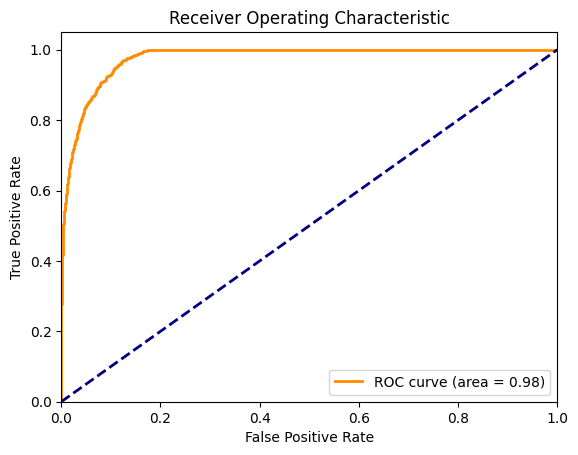

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Modle evaluation: Rank order and KS Statistic

In [ ]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
  'Default_Truth' : y_test,
  'Default_probability' : probabilities
})
df_eval.head()

,Default_Truth,Default_probability
19205,0,0.928
15514,0,0.000
30367,0,0.005
35347,0,0.077
41814,1,0.996


In [ ]:
df_eval['Decile'] = pd.qcut(df_eval['Default_probability'],10,labels=False,duplicates='drop')
df_eval.head()

,Default_Truth,Default_probability,decile,Decile
19205,0,0.928,9,9
15514,0,0.000,1,1
30367,0,0.005,5,5
35347,0,0.077,7,7
41814,1,0.996,9,9


In [ ]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default_probability'].min(),
    'Maximum Probability': x['Default_probability'].max(),
    'Events': x['Default_Truth'].sum(),
    'Non-events': x['Default_Truth'].count() - x['Default_Truth'].sum()
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\agamb\AppData\Local\Temp\ipykernel_1064\237655564.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.007,0.000,1249.000
6,6,0.007,0.046,1.000,1249.000
7,7,0.046,0.326,29.000,1220.000
8,8,0.326,0.918,204.000,1046.000
9,9,0.919,1.000,840.000,410.000


In [ ]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.007,0.000,1249.000,0.000,100.000
6,6,0.007,0.046,1.000,1249.000,0.080,99.920
7,7,0.046,0.326,29.000,1220.000,2.322,97.678
8,8,0.326,0.918,204.000,1046.000,16.320,83.680
9,9,0.919,1.000,840.000,410.000,67.200,32.800


In [ ]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.919,1.000,840.000,410.000,67.200,32.800
1,8,0.326,0.918,204.000,1046.000,16.320,83.680
2,7,0.046,0.326,29.000,1220.000,2.322,97.678
3,6,0.007,0.046,1.000,1249.000,0.080,99.920
4,5,0.001,0.007,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [ ]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.919,1.000,840.000,410.000,67.200,32.800,840.000,410.000
1,8,0.326,0.918,204.000,1046.000,16.320,83.680,1044.000,1456.000
2,7,0.046,0.326,29.000,1220.000,2.322,97.678,1073.000,2676.000
3,6,0.007,0.046,1.000,1249.000,0.080,99.920,1074.000,3925.000
4,5,0.001,0.007,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [ ]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.919,1.000,840.000,410.000,67.200,32.800,840.000,410.000,78.212,3.589
1,8,0.326,0.918,204.000,1046.000,16.320,83.680,1044.000,1456.000,97.207,12.746
2,7,0.046,0.326,29.000,1220.000,2.322,97.678,1073.000,2676.000,99.907,23.426
3,6,0.007,0.046,1.000,1249.000,0.080,99.920,1074.000,3925.000,100.000,34.361
4,5,0.001,0.007,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [ ]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.919,1.000,840.000,410.000,67.200,32.800,840.000,410.000,78.212,3.589,74.623
1,8,0.326,0.918,204.000,1046.000,16.320,83.680,1044.000,1456.000,97.207,12.746,84.460
2,7,0.046,0.326,29.000,1220.000,2.322,97.678,1073.000,2676.000,99.907,23.426,76.480
3,6,0.007,0.046,1.000,1249.000,0.080,99.920,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.007,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


In [ ]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,0,0,0,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,0,0,0,False


In [ ]:
gini_coeffecient = 2 * area - 1

print("AUC", area)
print("Gini Coeffecient:", gini_coeffecient)

In [ ]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [ ]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

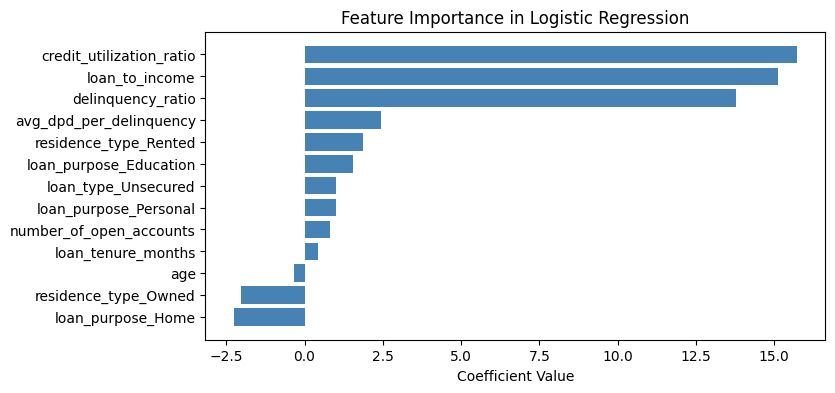

In [ ]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [ ]:
from joblib import dump
model_data = {
  'model' : final_model,
  'features' : X_train_encoded.columns,
  'scaler' : scaler,
  'cols_to_scale' : cols_to_scale
}
dump(model_data,'artifacts/model_data.joblib')

['artifacts/model_data.joblib']